<a href="https://colab.research.google.com/github/aamnaakhtar/movie_recommendation/blob/main/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# Importing the datasets

In [ ]:
movie_data = pd.read_csv('movies.csv')
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating_data = pd.read_csv('ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
dataset = pd.merge(rating_data, movie_data, on='movieId')
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Creating a dataframe for analysis

In [ ]:
dataframe = pd.DataFrame(dataset.groupby('title')['rating'].mean())
dataframe['Total number of ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count()) 
dataframe.head()

,rating,Total number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# Visualising the round-up ratings with the number of movies

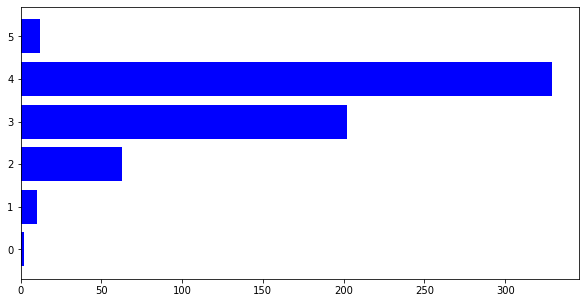

In [ ]:
plt.figure(figsize =(10, 5))
ax=plt.barh(dataframe['rating'].round(),dataframe['Total number of ratings'],color='blue')
plt.show()

# Visualising the number of reviews using a bar graph

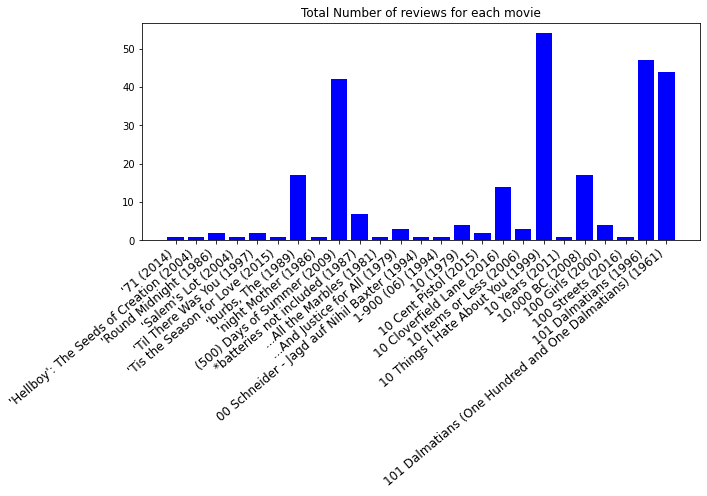

In [ ]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(dataframe.head(25).index,dataframe['Total number of ratings'].head(25),color='blue')
ax.set_xticklabels(dataframe.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

# Calculate mean rating and checking for the popular high rating movie

In [ ]:
dataset.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64